In [1]:
# import the pandas the library
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
sns.set()

# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# import the file for the student data
df_student = pd.read_csv('student_data.csv')

In [2]:
df_student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df_student.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
df_student.shape

(4424, 37)

In [5]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df_student.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         0
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           1
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
missing_value_formats=["n.a.","NA", "?", "n/a", "--", " ", "", "UnKnown", "Na"]

df_student=pd.read_csv("student_data.csv", na_values=missing_value_formats)

In [8]:
df_student.isnull().sum()

Marital status                                    1
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         1
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           2
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:
#drop any missing values (for rows or observatiosn here axis=0)
new_df_student=df_student.dropna(axis=0)

new_df_student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1.0,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1.0,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1.0,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [10]:
new_df_student.isnull().values.any()

False

In [13]:
new_df_student=df_student.dropna(axis=1)

In [14]:
new_df_student.isnull().sum()

Application mode                                  0
Application order                                 0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Educational special needs                         0
Gender                                            0
Scholarship holder                                0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular u

In [15]:
#before anything else, I need to split my data
#we do not perform PCA on the dependant variable, we choose it beforehand
#create dataset that has the dependant variables, not the independent



# I want to extract the signal of my remaining columns
#and create cumulative variance graph
#this is going to tell me the number of features that I need in a certain amount of signal
new_df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Daytime/evening attendance                      4424 non-null   int64  
 3   Previous qualification                          4424 non-null   int64  
 4   Previous qualification (grade)                  4424 non-null   float64
 5   Nacionality                                     4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Mother's occupation                             4424 non-null   int64  
 8   Father's occupation                             4424 non-null   int64  
 9   Educational special needs                

In [103]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 


new_df_student["Target"].unique()


array([None], dtype=object)

In [100]:
new_df_student["Target"]=new_df_student["Target"].replace({"Grad":"Graduate", "graduate":"Graduate", "Drop":"Dropout", "dropout":"Dropout"})

In [102]:
new_df_student["Target"].unique()

array([None], dtype=object)

In [82]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['Dropout'], ['Graduate'], ['Enrolled']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)



[['Dropout']
 ['Graduate']
 ['Enrolled']]
[[0.]
 [2.]
 [1.]]


In [113]:
student_n_label = new_df_student.drop('Target', axis=1)


KeyError: 'Target'

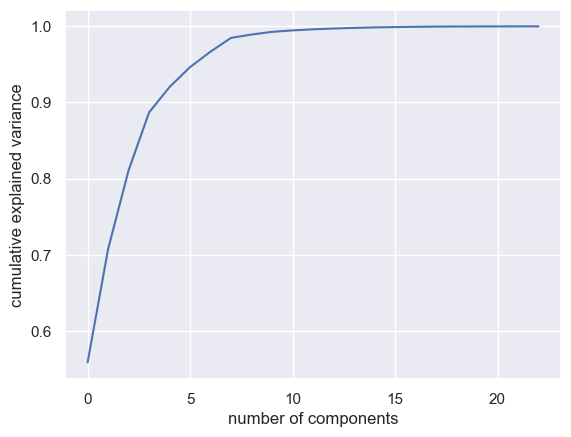

In [104]:
student_n_label = new_df_student.drop('Target', axis=1)
pca = PCA().fit(student_n_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [84]:
pca = PCA(7)
projected = pca.fit_transform(student_n_label)

In [85]:
projected.shape

(4424, 7)

In [87]:
student_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])

In [88]:
student_pca.head()

,C1,C2,C3,C4,C5,C6,C7
0,-5.719145,-3.020909,-2.805538,-10.626143,-1.450911,-2.963650,1.380224
1,-12.337190,-10.749566,20.522581,22.574830,-7.205947,-0.911112,-2.789838
2,-2.656710,-12.222600,-23.574599,-6.066253,4.516228,0.241726,1.568579
3,-9.184603,3.782976,-20.602290,-6.858502,-0.153080,1.223992,-0.400746
4,-1.354704,24.098604,-17.874583,-29.523612,-3.811650,-0.495265,0.585836


In [106]:
student_pca["Target"] = new_df_student["Target"]

In [107]:
student_array = student_pca.values

In [108]:
from sklearn.model_selection import train_test_split
X = student_array[:,0:4]
y = student_array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [109]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [93]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [115]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.